In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [15]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

[10/27/25 19:49:10] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=193071;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=932148;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

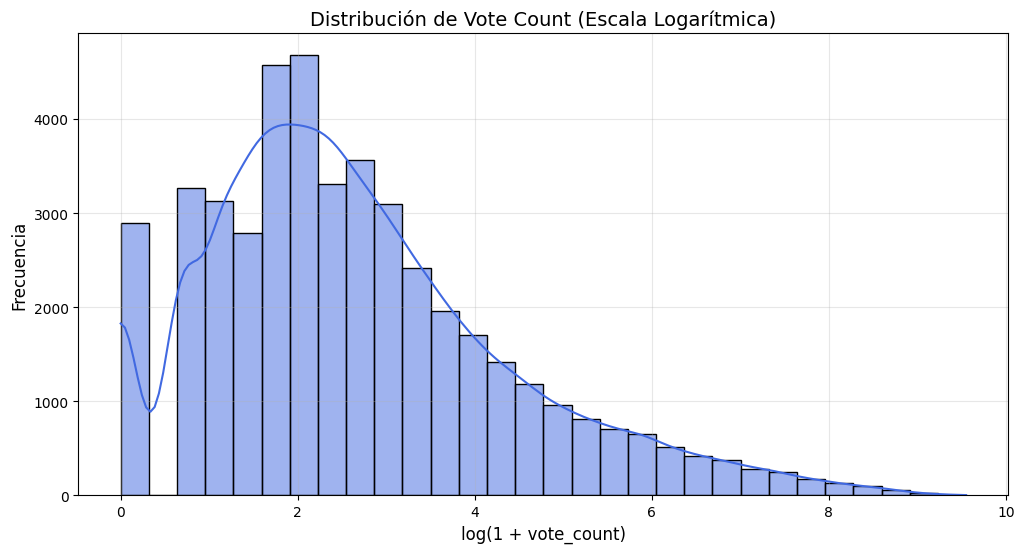

Estadísticas de vote_count:
count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizar la distribución de vote_count
plt.figure(figsize=(12, 6))

# Usamos logaritmo para mejorar la visualización (muchos valores pequeños y pocos muy grandes)
sns.histplot(np.log1p(data['vote_count']), bins=30, color='royalblue', kde=True)

plt.title('Distribución de Vote Count (Escala Logarítmica)', fontsize=14)
plt.xlabel('log(1 + vote_count)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Mostrar valores básicos
print("Estadísticas de vote_count:")
print(data['vote_count'].describe())



In [14]:
from sklearn.model_selection import train_test_split

# Supongamos que estas son tus variables predictoras
X = data[['budget', 'popularity', 'runtime']]  # Ejemplo
y = data['vote_count']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Convertir columnas a numéricas
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['vote_count'] = pd.to_numeric(movies_metadata['vote_count'], errors='coerce')

# Eliminar filas con valores nulos en las columnas que usaremos
movies_metadata = movies_metadata.dropna(subset=['revenue', 'vote_count'])

# Variables
X = movies_metadata[['revenue']]  # Predictor
y = movies_metadata['vote_count']  # Variable objetivo

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f" Regresión Lineal Simple: vote_count ~ revenue")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("="*50)

# Ecuación de regresión
coef = model.coef_[0]
intercept = model.intercept_
print(f"Ecuación: vote_count = {coef:.4e} * revenue + {intercept:.4f}")




[10/27/25 21:14:11] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=493417;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=666333;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 Regresión Lineal Simple: vote_count ~ revenue
Mean Squared Error (MSE): 82425.3937
Mean Absolute Error (MAE): 83.2301
Root Mean Squared Error (RMSE): 287.0982
R² Score: 0.6431
Ecuación: vote_count = 6.1658e-06 * revenue + 40.5443


In [19]:
# Seleccionar solo columnas numéricas
numeric_cols = movies_metadata.select_dtypes(include=['float64', 'int64'])

# Calcular correlación con vote_count
correlation = numeric_cols.corr()['vote_count'].sort_values(ascending=False)
print(correlation)


vote_count      1.000000
revenue         0.812022
budget          0.676642
popularity      0.559965
vote_average    0.123607
runtime         0.113539
Name: vote_count, dtype: float64


Conclusiones

R2: 0.6229 → Modelo con ajuste moderado 

Interpretación
Revenue es un buen predictor del número de votos que recibe una película

Modelo útil pero mejorable agregando variables adicionales como budget, popularity o runtime para un modelo multiple